In [2]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns



In [3]:
############################################################################################################

In [4]:
#################################################   ESPN   #################################################

In [5]:
############################################################################################################

## Crawling section

In [3]:
def getHistoryAndValidURls(url1):
    valid_url = url1
    history_url = ""

    history_index = url1.find("_/id/")
    history_url = url1[:history_index] + "history/" + url1[history_index:]  
    return valid_url,history_url
#"https://www.espn.com/mma/fighter/history/_/id/4702563/Natan-levy"
#"https://www.espn.com/mma/fighter/_/id/4702563"





In [9]:
url1,history_url=getHistoryAndValidURls("https://www.espn.com/mma/fighter/_/id/4702563")
url1
history_url

'https://www.espn.com/mma/fighter/history/_/id/4702563'

In [10]:
#################################Stats data of fighter1##################
#StatBlock__Content flex list ph4 pv3 justify-between
                          
#17 columns now
def getData_fromMainPage(url1):
    r = requests.get(url1)
    soup1 = BeautifulSoup(r.content, "html.parser")

    try:
        stats_data=soup1.findAll("ul",{"class":"StatBlock__Content flex list ph4 pv3 justify-between"})[0]
    except:
        stats_data = np.nan
    
    if stats_data != np.nan:
        try:
            record = stats_data.findAll("div",{"class":"StatBlockInner__Value tc fw-medium n2 clr-gray-02"})[0].text.split('-')
        except:
            record=np.nan

        try:
            ko = stats_data.findAll("div",{"class":"StatBlockInner__Value tc fw-medium n2 clr-gray-02"})[1].text.split('-')
        except:
            ko= np.nan

        try:
            sub = stats_data.findAll("div",{"class":"StatBlockInner__Value tc fw-medium n2 clr-gray-02"})[2].text.split('-')
        except:
            sub=np.nan
#    else:

    names=soup1.findAll("div",{"class":"PlayerHeader__Main_Aside min-w-0 flex-grow flex-basis-0"})[0]
    
    
    f_name = names.find("span",{"truncate min-w-0 fw-light"}).text
    
    
    l_name = names.find("span",{"truncate min-w-0"}).text

        

    ul_element = soup1.find("ul", {"class":"PlayerHeader__Bio_List"})

    # If the element exists, get all li elements
    if ul_element:
        li_elements = ul_element.find_all("li")
    data = {}
    for li in li_elements:
        ttu = li.find("div", {"class":"ttu"}).get_text()
        fw_medium = li.find("div", {"class":"fw-medium clr-black"}).get_text()
        data[ttu] = fw_medium

    if "Stance" in data:
        stance=data["Stance"]
    else:
        stance=np.nan

    if "HT/WT" in data:
        htwt=data["HT/WT"]
        height,weight = htwt.split(",")
    else:
        height,weight=0,0


    if "Birthdate" in data:
        age=data["Birthdate"]
        age = age.split("(")[-1][:-1]

    else:
        age=np.nan   
    



    try:
        personal_data_height1 =  height   #htwt.text.split(",")[0].split(" ")[0]

        personal_data_height2 =  height   #htwt.text.split(",")[0].split(" ")[1]
    except:
        personal_data_height1=0
        personal_data_height2=0


    try:                                     
        weight_ibs = weight
    except:
        weight_ibs=np.nan

    
    try:    
        country = soup1.findAll("ul",{"class":"PlayerHeader__Team_Info list flex pt1 pr4 min-w-0 flex-basis-0 flex-shrink flex-grow nowrap"}
                                        )[0].findAll("li",{"class":"truncate min-w-0"})[0].text
    except:
        country = np.nan
    
    

    try:    
        style_fighter = soup1.find("div" , {"class":"Table__ScrollerWrapper relative overflow-hidden"}).findAll("td",{"class":"Table__TD"})[1].text
    except:
        style_fighter = np.nan
    if "." in style_fighter or "-" in style_fighter:
        style_fighter = np.nan
        
   
    return [stats_data,record,ko,sub,f_name,l_name,personal_data_height1,personal_data_height2,stance,weight_ibs,country,age,style_fighter]
    






   

In [4]:
#df_espn["Total Wins"] = record[0]
#df_espn["Total Losses"] = record[1]
#df_espn["Total Draws"] = record[2]
    
#list_of_data_to_df_UFC,stats_data,record,ko,sub,f_name,l_name,personal_data_height1,personal_data_height2,stance,weight_ibs,country,age,style_fighter

def create_FighterLST(list_of_data_to_df_UFC,stats_data,record,ko,sub,f_name,l_name,personal_data_height1,personal_data_height2,stance,weight_ibs,country,age,style_fighter):
    list_of_data_to_df_UFC[4].append(f_name + " " + l_name)
    list_of_data_to_df_UFC[5].append(str(personal_data_height1))
    list_of_data_to_df_UFC[6].append(weight_ibs)
    list_of_data_to_df_UFC[7].append(style_fighter)     #Style(op)
    list_of_data_to_df_UFC[8].append(country)
    list_of_data_to_df_UFC[9].append(age)
    list_of_data_to_df_UFC[10].append(stance)

    try:
        list_of_data_to_df_UFC[11].append(ko[0])
        list_of_data_to_df_UFC[12].append(ko[1])
    except:
        list_of_data_to_df_UFC[11].append(np.nan)
        list_of_data_to_df_UFC[12].append(np.nan)
    
    try:
        list_of_data_to_df_UFC[13].append(sub[0])
        list_of_data_to_df_UFC[14].append(sub[1])
    except:
        list_of_data_to_df_UFC[13].append(np.nan)
        list_of_data_to_df_UFC[14].append(np.nan)
    
    try:
        list_of_data_to_df_UFC[15].append(record[0])
        list_of_data_to_df_UFC[16].append(record[1])
        list_of_data_to_df_UFC[17].append(record[2])
    except:
        list_of_data_to_df_UFC[15].append(np.nan)
        list_of_data_to_df_UFC[16].append(np.nan)
        list_of_data_to_df_UFC[17].append(np.nan)


In [19]:
ul_element = soup1.find("ul", {"class":"PlayerHeader__Bio_List"})

# If the element exists, get all li elements
if ul_element:
    li_elements = ul_element.find_all("li")
data = {}
for li in li_elements:
    ttu = li.find("div", {"class":"ttu"}).get_text()
    fw_medium = li.find("div", {"class":"fw-medium clr-black"}).get_text()
    data[ttu] = fw_medium

if "Stance" in data:
    stance=data["Stance"]
else:
    stance=np.nan

if "HT/WT" in data:
    weight_ibs=data["HT/WT"]
else:
    weight_ibs=np.nan


if "Age" in data:
    age=data["Age"]
else:
    age=np.nan   



In [5]:


#pd.DataFrame(columns=list_of_data_to_df_UFC[0])
def create_My_Battles_DF(list_of_data_to_df_UFC):
     d = {#list_of_data_to_df_UFC[0][0] : list_of_data_to_df_UFC[0][1:],
          #list_of_data_to_df_UFC[1][0] : list_of_data_to_df_UFC[1][1:],
          #list_of_data_to_df_UFC[2][0] : list_of_data_to_df_UFC[2][1:],
          #list_of_data_to_df_UFC[3][0] : list_of_data_to_df_UFC[3][1:],
          list_of_data_to_df_UFC[4][0] : list_of_data_to_df_UFC[4][1:],
          list_of_data_to_df_UFC[5][0] : list_of_data_to_df_UFC[5][1:],
          list_of_data_to_df_UFC[6][0] : list_of_data_to_df_UFC[6][1:],
          list_of_data_to_df_UFC[7][0] : list_of_data_to_df_UFC[7][1:],
          list_of_data_to_df_UFC[8][0] : list_of_data_to_df_UFC[8][1:],
          list_of_data_to_df_UFC[9][0] : list_of_data_to_df_UFC[9][1:],
          list_of_data_to_df_UFC[10][0] : list_of_data_to_df_UFC[10][1:], 
          list_of_data_to_df_UFC[11][0] : list_of_data_to_df_UFC[11][1:],
          list_of_data_to_df_UFC[12][0] : list_of_data_to_df_UFC[12][1:],
          list_of_data_to_df_UFC[13][0] : list_of_data_to_df_UFC[13][1:],
          list_of_data_to_df_UFC[14][0] : list_of_data_to_df_UFC[14][1:],
          list_of_data_to_df_UFC[15][0] : list_of_data_to_df_UFC[15][1:],
          list_of_data_to_df_UFC[16][0] : list_of_data_to_df_UFC[16][1:],
          list_of_data_to_df_UFC[17][0] : list_of_data_to_df_UFC[17][1:] 

          #opponents Data
          #
          #


     }
     df_UFC = pd.DataFrame(d)
     return df_UFC



In [21]:
###



In [23]:
#df_UFC["Date"] = df_espn["Date"]
#df_UFC["Opponent"] = df_espn["Opponent"]
#df_UFC["Res"] = df_espn["Res."]
#df_UFC["Rnd"] = df_espn["Rnd"]
#df_UFC["Time"] = df_espn["Time"]
#df_UFC["Decision"] = df_espn["Decision"]



#df_UFC

In [ ]:
url_history = "https://www.espn.com/mma/fighter/history/_/id/4702563/Natan-levy"


r = requests.get(url_history)
soup1 = BeautifulSoup(r.content, "html.parser")
mtag_table_espn=soup1.findAll("table",{"class":"Table Table--align-right"})[0]

row_name_espn = []
row_vals_espn = []
i=1

#########כבר לא שימושי ####################
for t in mtag_table_espn.findAll("th"):
     print(t.text)
     row_name_espn.append(t.text)
##########################################

print("########################################")

df_espn = pd.DataFrame(columns=row_name_espn)

for tr in mtag_table_espn.findAll("tr"):
    for td in tr.findAll("td"):
        #print(td.text)
        
        row_vals_espn.append(td.text)

    #print(row_vals_espn)
    if row_vals_espn != []:
        df_espn.loc[len(df_espn)] = row_vals_espn
    row_vals_espn = []
    #print("--------------------------------------")
row_vals_espn

df_espn


In [48]:
#מוכן סופית להרצה של כל הלינקים של ההסיטורי
def getData_fromHistoryPage(history_links):
#    for url in url_history:
    k=1
    for url_history in history_links:
        try:
            r = requests.get(url_history)
            soup1 = BeautifulSoup(r.content, "html.parser")
            mtag_table_espn=soup1.findAll("table",{"class":"Table Table--align-right"})[0]

            row_name_espn = []
            row_vals_espn = []
            i=1

            
            for t in mtag_table_espn.findAll("th"):
                row_name_espn.append(t.text)


            w_val=0
            l_val=0
            d_val=0
            
            df_history =[]
            df_history = pd.DataFrame(columns=row_name_espn)
            if k==1:
                df_history.to_csv('fightsHistory.csv', mode='a', header=True)
                k=2
            else:
                df_history.to_csv('fightsHistory.csv', mode='a', header=False)
            for tr in mtag_table_espn.findAll("tr"):
                #df_history = pd.DataFrame(columns=row_name_espn)
                cnt=0
                for td in tr.findAll("td"):

                    row_vals_espn.append(td.text)
                if row_vals_espn != []:
                    df_history.loc[len(df_history)] = row_vals_espn
                row_vals_espn = []
                #print("--------------------------------------")

            df_history["Wins"]=0
            df_history["Losses"]=0
            df_history["Draws"]=0


            for i in range(len(df_history) - 1, -1, -1):
                df_history.iloc[i,7] = int(w_val)
                df_history.iloc[i,8] = int(l_val)
                df_history.iloc[i,9] = int(d_val)

                if df_history.iloc[i][2] == "W":
                    w_val = w_val+1
                elif df_history.iloc[i][2] == "L":
                    l_val = l_val+1    
                elif df_history.iloc[i][2] == "D":
                    d_val = d_val+1
                
               
            
            
            names=soup1.findAll("div",{"class":"PlayerHeader__Main_Aside min-w-0 flex-grow flex-basis-0"})[0]
            f_name = names.find("span",{"truncate min-w-0 fw-light"}).text             
            l_name = names.find("span",{"truncate min-w-0"}).text
            df_history["Fighter"]= f_name+ " "+ l_name

            
        except:
            print(history_links.index(url_history))
            continue
        df_history.to_csv('fightsHistory.csv', mode='a', header=False)
    return df_history



In [14]:
###############################################ניסוי########################################
import requests
from bs4 import BeautifulSoup

def scrape_fighters_links(url):
    # Send a GET request to the specified URL
    response = requests.get(url)
    
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all the anchor tags on the page
    links = soup.find_all('a')
    
    # Iterate through the links and filter out only the links to fighter's pages
    fighter_links = []
    for link in links:
        if '/mma/fighter/' in link['href']:
            fighter_links.append(link['href'])
    return fighter_links







In [6]:

def build_new_df(fights_dataframe, fighters_dataframe, columns):
    new_df = pd.DataFrame(columns=columns)
    for index, row in fights_dataframe.iterrows():
        opponent = row['Opponent']
        opponent_row = fighters_dataframe[fighters_dataframe['Fighter'] == opponent]
        if opponent_row.empty:
            continue
        #new_row = [opponent_row.get(column, np.nan) for column in columns]
        new_row = [opponent_row.at[opponent_row.index[0], column] if column in opponent_row.columns else np.nan for column in columns]

        new_df = new_df.append(pd.Series(new_row, index=columns), ignore_index=True)
    return new_df


In [15]:
def fixLinks(fighters_links):
    prefix_ADD = 'http://www.espn.com'
    new_list = [prefix_ADD + x for x in fighters_links]
    return new_list

In [7]:
def getStats_of_Oppo_by_iterr(merged_cleaned_copy):
    # iterate through the rows of the dataframe
    for index, row in merged_cleaned_copy.iterrows():
        opponent_name = row['Opponent']
        opponent_date = row['Date']
        
        # find the second row where the opponent exists
        opponent_row = merged_cleaned_copy.loc[(merged_cleaned_copy['Fighter'] == opponent_name) & (merged_cleaned_copy['Date'] == opponent_date)]
        
        if opponent_row.empty:
            # opponent not found
            continue
        else:
            opponent_wins = opponent_row.iloc[0]['W']
            opponent_losses = opponent_row.iloc[0]['L']
            opponent_draws = opponent_row.iloc[0]['D']
            
            # update the current row with the opponent's Total Wins, Total Losses, and Total Draws
            merged_cleaned_copy.at[index, 'Oppo_W'] = opponent_wins
            merged_cleaned_copy.at[index, 'Oppo_L'] = opponent_losses
            merged_cleaned_copy.at[index, 'Oppo_D'] = opponent_draws
    merged_cleaned_copy=merged_cleaned_copy.dropna(subset=['Oppo_W', 'Oppo_L','Oppo_D'])

    unique_fights = []
    for index, row in merged_cleaned_copy.iterrows():
        if (row['Opponent'], row['Fighter'], row['Date']) in unique_fights:
            merged_cleaned_copy = merged_cleaned_copy.drop(index)
            continue
        unique_fights.append((row['Fighter'], row['Opponent'], row['Date']))
    # Convert the "Age" column from float to int
    merged_cleaned_copy['Oppo_W'] = merged_cleaned_copy['Oppo_W'].astype(int)
    merged_cleaned_copy['Oppo_L'] = merged_cleaned_copy['Oppo_L'].astype(int)
    merged_cleaned_copy['Oppo_D'] = merged_cleaned_copy['Oppo_D'].astype(int)
    return merged_cleaned_copy

In [16]:
#להריץ את זה אחרי שסיימנו לקבל את כל הנתונים מלמעלה:
#זה הוצאת הנתון של אורך מוטות ידיים:



def getBioLink(link):
    bioLink = ""
    #https://www.espn.com/mma/fighter/_/id/4874988/genaro-valdez
    #https://www.espn.com/mma/fighter/bio/_/id/4874988/genaro-valdez
    #https://www.espn.com/mma/fighter/history/_/id/4874988/genaro-valdez
        

    bio_index = link.find("_/id/")
    bioLink = link[:bio_index] + "bio/" + link[bio_index:]  
    return bioLink

def getMoreDataOfFighter(Allfighters_MainPage_links):

    df=pd.DataFrame(columns={"Name","Reach","WT_class"})
    df.to_csv('moreData.csv', mode='a', header=True)
    for link in Allfighters_MainPage_links:
        df=pd.DataFrame(columns={"Name","Reach","WT_class"})
        try: 
            bioLink = getBioLink(link)
            response = requests.get(bioLink)
            soup = BeautifulSoup(response.text, 'html.parser')

        
            names=soup.findAll("div",{"class":"PlayerHeader__Main_Aside min-w-0 flex-grow flex-basis-0"})[0]
                
                
            f_name = names.find("span",{"truncate min-w-0 fw-light"}).text
                
                
            l_name = names.find("span",{"truncate min-w-0"}).text
            reach = soup.find('span', text='Reach').find_next('span').text.strip()
            WT_class = soup.find('span', text='WT Class').find_next('span').text.strip()

            print("Name:", f_name+ " "+ l_name)
            print("Reach:", reach)
            print("WT_class:", WT_class)
            print("Link-Index:",Allfighters_MainPage_links.index(link))
        except:
            continue
        new_raw={'Name': f_name+ " "+ l_name, 'Reach': reach, 'WT_class': WT_class}
        df = df.append(new_raw,ignore_index=True)
        df.to_csv('moreData.csv', mode='a', header=False)
    df=pd.DataFrame(pd.read_csv("moreData.csv"))
    return df

In [17]:

df=pd.DataFrame(columns={"Name","Reach","WT_class"})
df

Empty DataFrame
Columns: [WT_class, Reach, Name]
Index: []

## Cleaning Data - Functions -

In [8]:
def clean_my_data(merged,player,Height,Weight,Reach):
# Extract the feet and inches values using str.extract
    try:
        merged[['ft', 'in']] = merged[Height].str.extract("(\d+)' (\d+)\"")

        # Convert feet and inches to centimeters
        merged[Height] = (merged['ft'].astype(int) * 12 + merged['in'].astype(int)) * 2.54
        merged[Height] = (merged[Height] * 0.393701).astype(int)

        # Drop the ft and in columns
        merged.drop(['ft', 'in'], axis=1, inplace=True)

        # Rename the Height column


        merged[Weight] = merged[Weight].str.extract('(\d+)').astype(int)
        merged.rename(columns={Weight: Weight+'(lbs)'}, inplace=True)
    except:
        print("maybe you ran this cell before...")

    try:
        merged[Weight] = merged[Weight].str.extract('(\d+)').astype(int)
        merged.rename(columns={Weight: Weight+'(lbs)'}, inplace=True)
    except:
        print("maybe you ran this cell before...")

    try:
        merged[Weight] = merged[Weight].str.extract('(\d+)').astype(int)
        merged[Reach] = merged[Reach].str.extract("(\d+)\"")
    except:
        print("maybe you ran this cell before...") 

    try:
        merged['Reach'] = merged['Reach'].str.extract('(\d+)').astype(int)
    except:
        print("maybe you ran this cell before...") 
    if player == 1:
        merged['BMI'] = (merged['Weight(lbs)'] / (merged['Height']**2))* 703
        #scaler = MinMaxScaler(feature_range=(1, 10))
        #merged['BMI'] = scaler.fit_transform(merged[['BMI']])
        merged['Win_Percentage'] = merged['W'] / (merged['W'] + merged['D'] + merged['L'])*100
        merged['Day'] = merged['Date'].dt.day
        merged['Month'] = merged['Date'].dt.month
        merged['Year'] = merged['Date'].dt.year


    merged.fillna(0,inplace=True)

    return merged

## Main Function:

In [20]:
#################################################     MAIN   FUNCTION     ###############################################

mainPage_Url = 'http://www.espn.com/mma/fighters'
options = Options()
options.add_experimental_option("detach", True)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get(mainPage_Url)

list_of_data_to_df_UFC = [["Date"],["Year"],["Month"],
                          ["Day"],["Fighter"],["Height"],
                          ["Weight"],["Style(op)"],["Country"],
                          ["Age"],["Stance"],["Wins KO"],
                          ["Losses Ko"],["Wins Sub"],["Losses Sub"],
                          ["Total Wins"],["Total Losses"],["Total Draw"],
                          ['Opponent'], ['Res'], ['Decision'], ['Rnd'], ['Time'], ['Event']
                          ]


#FOR I='a'
fighters_links = scrape_fighters_links("http://www.espn.com/mma/fighters")
for i in range(98,123): #123
    
    fighters_links = fighters_links + scrape_fighters_links(f"http://www.espn.com/mma/fighters?search={chr(i)}")
    time.sleep(10)

Allfighters_HistoryPage_links = []
Allfighters_MainPage_links = fixLinks(fighters_links.copy())
for link in Allfighters_MainPage_links:
    val,his=getHistoryAndValidURls(link)
    Allfighters_HistoryPage_links.append(his)










#########################################################################################################################

[WDM] - Downloading: 100%|██████████| 6.79M/6.79M [00:05<00:00, 1.39MB/s]


In [36]:
.
list_of_data_to_df_UFC = [["Date"],["Year"],["Month"],
                          ["Day"],["Fighter"],["Height"],
                          ["Weight"],["Style(op)"],["Country"],
                          ["Age"],["Stance"],["Wins KO"],
                          ["Losses Ko"],["Wins Sub"],["Losses Sub"],
                          ["Total Wins"],["Total Losses"],["Total Draw"],
                          ['Opponent'], ['Res'], ['Decision'], ['Rnd'], ['Time'], ['Event']
                          ]
list_of_data_to_df_UFC_colsName = list_of_data_to_df_UFC.copy()
create_My_Battles_DF(list_of_data_to_df_UFC_colsName).to_csv('existing_data1.csv', mode='a', header=True)
for link in Allfighters_MainPage_links[21328:]:  
    try:  
        create_FighterLST(list_of_data_to_df_UFC,getData_fromMainPage(link)[0],getData_fromMainPage(link)[1],getData_fromMainPage(link)[2],getData_fromMainPage(link)[3]
                            ,getData_fromMainPage(link)[4],getData_fromMainPage(link)[5],getData_fromMainPage(link)[6],getData_fromMainPage(link)[7],getData_fromMainPage(link)[8]
                            ,getData_fromMainPage(link)[9],getData_fromMainPage(link)[10],getData_fromMainPage(link)[11],getData_fromMainPage(link)[12])
        
        if Allfighters_MainPage_links.index(link) % 2 == 0:
            # Create a list of data
            data = list_of_data_to_df_UFC

            create_My_Battles_DF(list_of_data_to_df_UFC).to_csv('existing_data1.csv', mode='a', header=False)

        else:
            continue
    except:
        try:  
            create_FighterLST(list_of_data_to_df_UFC,getData_fromMainPage(link)[0],getData_fromMainPage(link)[1],getData_fromMainPage(link)[2],getData_fromMainPage(link)[3]
                            ,getData_fromMainPage(link)[4],getData_fromMainPage(link)[5],getData_fromMainPage(link)[6],getData_fromMainPage(link)[7],getData_fromMainPage(link)[8]
                            ,getData_fromMainPage(link)[9],getData_fromMainPage(link)[10],getData_fromMainPage(link)[11],getData_fromMainPage(link)[12])
        
            if Allfighters_MainPage_links.index(link) % 2 == 0:
            # Create a list of data
                data = list_of_data_to_df_UFC

                create_My_Battles_DF(list_of_data_to_df_UFC).to_csv('existing_data1.csv', mode='a', header=False)

            else:
                continue
        except:
            print(link)
            print(Allfighters_MainPage_links.index(link))
    
    list_of_data_to_df_UFC = [["Date"],["Year"],["Month"],
                          ["Day"],["Fighter"],["Height"],
                          ["Weight"],["Style(op)"],["Country"],
                          ["Age"],["Stance"],["Wins KO"],
                          ["Losses Ko"],["Wins Sub"],["Losses Sub"],
                          ["Total Wins"],["Total Losses"],["Total Draw"],
                          ['Opponent'], ['Res'], ['Decision'], ['Rnd'], ['Time'], ['Event']
                          ]
        
    

http://www.espn.com/mma/fighter/_/id/4565737/nick-palmer
21335
http://www.espn.com/mma/fighter/_/id/4684892/vito-paolili
21377
http://www.espn.com/mma/fighter/_/id/2594095/kon-papaioannou
21383
http://www.espn.com/mma/fighter/_/id/2593990/claude-paquette
21391
http://www.espn.com/mma/fighter/_/id/3024279/dong-kyu-park
21423
http://www.espn.com/mma/fighter/_/id/4419631/ricky-parker
21474
http://www.espn.com/mma/fighter/_/id/2617856/matt-paré
21507
http://www.espn.com/mma/fighter/_/id/2594062/patrick-patlan
21540
http://www.espn.com/mma/fighter/_/id/4976700/jean-patrick
21546
http://www.espn.com/mma/fighter/_/id/5123196/jake-paul
21568
http://www.espn.com/mma/fighter/_/id/2594349/charlie-pearson
21625
http://www.espn.com/mma/fighter/_/id/2506568/jessica-pene
21717
http://www.espn.com/mma/fighter/_/id/2565497/cecil-peoples
21746
http://www.espn.com/mma/fighter/_/id/3012501/ben-pepper
21750
http://www.espn.com/mma/fighter/_/id/3157016/robbie-peralta
21760
http://www.espn.com/mma/fighter/_/

In [ ]:
.
df_moreData=getMoreDataOfFighter(Allfighters_MainPage_links)
df_moreData


In [50]:
x=getData_fromHistoryPage(Allfighters_HistoryPage_links)
x

14
17
27
118
160
164
202
208
217
265
311
322
358
395
401
471
490
493
535
539
575
605
642
646
650
652
686
710
732
737
789
791
829
853
868
917
921
947
1009
1030
1042
1065
1098
1102
1266
1303
1342
1343
1349
1364
1380
1409
1447
1487
1537
1602
1655
1724
1746
1781
1847
1869
1897
1924
1955
1956
2002
2012
2024
2053
2064
2115
2125
2140
2156
2161
2190
2195
2198
2234
2249
2317
2331
2352
2436
2455
2471
2473
2485
2495
2496
2503
2509
2511
2533
2563
2575
2583
2610
2629
2674
2694
2697
2724
2784
2808
2811
2817
2824
2825
2841
2864
2899
2935
3007
3111
3128
3135
3163
3195
3200
3202
3203
3289
3310
3331
3333
3378
3409
3419
3456
3467
3490
3520
3526
3528
3530
3533
3571
3597
3633
3640
3658
3675
3707
3734
3749
3767
3788
3885
3922
3924
3935
3950
3971
3977
4002
4023
4073
4079
4115
4127
4130
4191
4204
4207
4238
4244
4262
4266
4331
4337
4369
4375
4397
4400
4409
4427
4447
4455
4462
4568
4577
4685
4723
4741
4750
4763
4783
4784
4792
4801
4832
4866
4906
4922
4982
4983
5026
5058
5087
5088
5132
5133
5151
5179
5211
5238
5

Date      Opponent Res.            Decision Rnd  Time  \
0  May 21, 2016  Daniel Barez    W  Unanimous Decision   3  5:00   

                     Event  Wins  Losses  Draws       Fighter  
0  PLMMA 67: Nastula Cup 1     0       0      0  Dawid Zywica

In [9]:
df_moreData=pd.DataFrame(pd.read_csv("moreData.csv"))
df_moreData.rename(columns={'Name': 'Fighter'}, inplace=True)
df_moreData=df_moreData.reindex(columns=['Fighter', 'Reach', 'WT_class'])
df_moreData


Fighter  Reach             WT_class
0             Tommy Aaron    71"         Welterweight
1         Nariman Abbasov    66"          Lightweight
2        Hamdy Abdelwahab    72"          Heavyweight
3     Shamil Abdurakhimov    76"          Heavyweight
4              Daichi Abe    71"         Welterweight
...                   ...    ...                  ...
3007         Dragos Zubco  72.5"    Light Heavyweight
3008            Leo Zulic    70"        Featherweight
3009         Allan Zuniga    70"          Lightweight
3010      Brahyan Zurcher    70"        Featherweight
3011     Weronika Zygmunt    62"  Women's Strawweight

[3012 rows x 3 columns]

In [10]:
fights_df=pd.DataFrame(pd.read_csv("fightsHistory.csv"))
fights_df[fights_df["Fighter"]=="Natan Levy"]

Date     Fighter           Opponent Res.  \
65651   Dec 3, 2022  Natan Levy      Genaro Valdez    W   
65652  Apr 30, 2022  Natan Levy       Mike Breeden    W   
65653  Nov 20, 2021  Natan Levy        Rafa Garcia    L   
65654  Nov 10, 2020  Natan Levy    Shaheen Santana    W   
65655  Aug 21, 2020  Natan Levy           Ben Lugo    W   
65656   Jun 7, 2019  Natan Levy     Nicholas Badis    W   
65657  Jan 25, 2019  Natan Levy     Henry Barahona    W   
65658  Jul 20, 2018  Natan Levy  Cameron Underhill    W   
65659  Mar 23, 2018  Natan Levy        Marcus Sims    W   

                      Decision Rnd   Time  \
65651     Decision - Unanimous   3  05:00   
65652     Decision - Unanimous   3  05:00   
65653     Decision - Unanimous   3  05:00   
65654               Submission   3  00:55   
65655      Decision - Majority   3  05:00   
65656     Decision - Unanimous   3  05:00   
65657     Decision - Unanimous   3  05:00   
65658  Submission (Guillotine)   1  00:31   
65659      Submission (Armbar)   1  01:25   

                                                 Event  W  L  D  
65651            UFC Fight Night: Thompson vs. Holland  7  1  0  
65652                   UFC Fight Night: Font vs. Vera  6  1  0  
65653                 UFC Fight Night: Vieira vs. Tate  6  0  0  
65654  Dana White's Contender Series: Season 4, Week 9  5  0  0  
65655                      LFA 88: Willis vs. De Jesus  4  0  0  
65656                         LFA 69: Perez vs. Moreno  3  0  0  
65657                          LFA 58: Park vs. Willis  2  0  0  
65658                         LFA 45: Silva vs. Barnes  1  0  0  
65659                           LFA 36: Simon vs. Zani  0  0  0

In [11]:
#concatinate all the dataframes of datat of all fighters and their fights
#concat all thye data to 1 df
fighters_df=pd.DataFrame(pd.read_csv("existing_data.csv"))
fighters_df = fighters_df.drop(index=2625,axis=1)
df_moreData=pd.DataFrame(pd.read_csv("moreData.csv"))
df_moreData.rename(columns={'Name': 'Fighter'}, inplace=True)
df_moreData=df_moreData.reindex(columns=['Fighter', 'Reach', 'WT_class'])
fighters_df=fighters_df.set_index('Fighter')
df_moreData=df_moreData.set_index('Fighter')
fighters_df = pd.merge(fighters_df, df_moreData, left_index=True, right_index=True, how='outer')
fighters_df = fighters_df.reset_index()

fighters_df_relevent = fighters_df.dropna(how='any')
fighters_df_relevent.drop_duplicates(subset='Fighter', inplace=True)


#concat the fighters dataframe with their opponents fights:
list_of_names=fighters_df_relevent["Fighter"]
fights_df=fights_df[fights_df["Fighter"].isin(list_of_names)]
merged = pd.merge(fighters_df_relevent, fights_df, on='Fighter')
merged=merged.drop(columns=["Wins KO", "Losses Ko","Wins Sub","Losses Sub","Total Wins","Total Losses",	"Total Draw"])
merged['Date'] = pd.to_datetime(merged['Date'])



#concat all the data of opponent
columns = ['Fighter','Style(op)','Country','Age','Stance','Reach','WT_class']
opponents_data_df = build_new_df(merged, fighters_df, columns)
opponents_data_df.drop_duplicates(subset='Fighter', inplace=True)
opponents_data_df = opponents_data_df.dropna(how='any')
columns = opponents_data_df.columns.tolist()
columns = [col if col == 'Fighter' else f"Oppo_{col}" for col in columns]
opponents_data_df.columns = columns
opponents_data_df = opponents_data_df.rename(columns={"Fighter": "Opponent"})
merged = pd.merge(merged, opponents_data_df, on='Opponent',how="left")
#נשאר רק לתקן את הסטאטס דאטה של המתחרה וזהו

#cleaning Data
c=clean_my_data(merged.copy(),1,"Height","Weight","Reach")
c2=clean_my_data(c,2,"Oppo_Height","Oppo_Weight","Oppo_Reach")
merged_cleaned = c2
merged_cleaned=merged_cleaned.dropna(how='any')
merged_cleaned=getStats_of_Oppo_by_iterr(merged_cleaned)
merged_cleaned = merged_cleaned[merged_cleaned['Oppo_Reach'] != 0]
merged_cleaned['Oppo_Reach'] = merged_cleaned['Oppo_Reach'].str.extract('(\d+)').astype(int)
merged_cleaned['Oppo_Win_Percentage'] = merged_cleaned['Oppo_W'] / (merged_cleaned['Oppo_W'] + merged_cleaned['Oppo_D'] + merged_cleaned['Oppo_L'])*100
#merged_cleaned['Oppo_BMI'] = (merged_cleaned['Oppo_Weight(lbs)'] / (merged_cleaned['Oppo_Height']**2))* 703
merged_cleaned['Oppo_Win_Percentage'] = merged_cleaned['Oppo_W'] / (merged_cleaned['Oppo_W'] + merged_cleaned['Oppo_D'] + merged_cleaned['Oppo_L'])*100
merged_cleaned.to_csv("GOLMI.csv")
merged_cleaned

C:\Users\Owner\AppData\Local\Temp\ipykernel_15044\3231102153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fighters_df_relevent.drop_duplicates(subset='Fighter', inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_15044\2728561749.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(new_row, index=columns), ignore_index=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_15044\2728561749.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(new_row, index=columns), ignore_index=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_15044\2728561749.py:11: Fu

maybe you ran this cell before...
maybe you ran this cell before...
maybe you ran this cell before...
maybe you ran this cell before...
maybe you ran this cell before...
maybe you ran this cell before...


Fighter  Height  Weight(lbs)           Style(op) Country Age  \
0          AJ Dobson      73          185           Muay Thai     USA  31   
3          AJ Dobson      73          185           Muay Thai     USA  31   
9        AJ Fletcher      70          170             Striker     USA  25   
10       AJ Fletcher      70          170             Striker     USA  25   
11       AJ Fletcher      70          170             Striker     USA  25   
...              ...     ...          ...                 ...     ...  ..   
12842    Tim Boetsch      72          185           Wrestling     USA  42   
13059   Trevin Giles      72          170  Wrestling, Striker     USA  30   
13095   Trevor Smith      75          185             Striker     USA  42   
13156  Tyron Woodley      69          171           Wrestling     USA  40   
13602       Wu Yanan      68          136             Striker   China  26   

         Stance  Reach           WT_class       Date  ...  \
0      Orthodox     76       Middleweight 2022-10-22  ...   
3      Orthodox     76       Middleweight 2020-11-07  ...   
9        Switch     67       Welterweight 2022-08-20  ...   
10       Switch     67       Welterweight 2022-03-12  ...   
11       Switch     67       Welterweight 2021-08-31  ...   
...         ...    ...                ...        ...  ...   
12842  Orthodox     74       Middleweight 2012-02-25  ...   
13059  Orthodox     74       Middleweight 2019-05-18  ...   
13095  Orthodox     75       Middleweight 2018-12-15  ...   
13156  Orthodox     74       Welterweight 2021-03-27  ...   
13602  Orthodox     66  Women's Flyweight 2016-09-04  ...   

              Oppo_WT_class        BMI Win_Percentage Day Month  Year  Oppo_W  \
0         Light Heavyweight  24.405142      75.000000  22    10  2022       7   
3              Middleweight  24.405142      80.000000   7    11  2020       4   
9              Welterweight  24.389796      90.000000  20     8  2022       8   
10             Welterweight  24.389796     100.000000  12     3  2022       9   
11             Welterweight  24.389796     100.000000  31     8  2021      10   
...                     ...        ...            ...  ..   ...   ...     ...   
12842          Middleweight  25.087770      77.777778  25     2  2012      26   
13059          Middleweight  23.053627     100.000000  18     5  2019      22   
13095          Middleweight  23.120889      65.217391  15    12  2018      21   
13156          Welterweight  25.249527      73.076923  27     3  2021      19   
13602  Women's Bantamweight  20.676471     100.000000   4     9  2016       8   

       Oppo_L  Oppo_D Oppo_Win_Percentage  
0           2       0           77.777778  
3           1       1           66.666667  
9           3       0           72.727273  
10          3       0           75.000000  
11          2       1           76.923077  
...       ...     ...                 ...  
12842       6       0           81.250000  
13059       6       0           78.571429  
13095       6       0           77.777778  
13156       7       1           70.370370  
13602       2       0           80.000000  

[1510 rows x 34 columns]

In [12]:
merged_cleaned


Fighter  Height  Weight(lbs)           Style(op) Country Age  \
0          AJ Dobson      73          185           Muay Thai     USA  31   
3          AJ Dobson      73          185           Muay Thai     USA  31   
9        AJ Fletcher      70          170             Striker     USA  25   
10       AJ Fletcher      70          170             Striker     USA  25   
11       AJ Fletcher      70          170             Striker     USA  25   
...              ...     ...          ...                 ...     ...  ..   
12842    Tim Boetsch      72          185           Wrestling     USA  42   
13059   Trevin Giles      72          170  Wrestling, Striker     USA  30   
13095   Trevor Smith      75          185             Striker     USA  42   
13156  Tyron Woodley      69          171           Wrestling     USA  40   
13602       Wu Yanan      68          136             Striker   China  26   

         Stance  Reach           WT_class       Date  ...  \
0      Orthodox     76       Middleweight 2022-10-22  ...   
3      Orthodox     76       Middleweight 2020-11-07  ...   
9        Switch     67       Welterweight 2022-08-20  ...   
10       Switch     67       Welterweight 2022-03-12  ...   
11       Switch     67       Welterweight 2021-08-31  ...   
...         ...    ...                ...        ...  ...   
12842  Orthodox     74       Middleweight 2012-02-25  ...   
13059  Orthodox     74       Middleweight 2019-05-18  ...   
13095  Orthodox     75       Middleweight 2018-12-15  ...   
13156  Orthodox     74       Welterweight 2021-03-27  ...   
13602  Orthodox     66  Women's Flyweight 2016-09-04  ...   

              Oppo_WT_class        BMI Win_Percentage Day Month  Year  Oppo_W  \
0         Light Heavyweight  24.405142      75.000000  22    10  2022       7   
3              Middleweight  24.405142      80.000000   7    11  2020       4   
9              Welterweight  24.389796      90.000000  20     8  2022       8   
10             Welterweight  24.389796     100.000000  12     3  2022       9   
11             Welterweight  24.389796     100.000000  31     8  2021      10   
...                     ...        ...            ...  ..   ...   ...     ...   
12842          Middleweight  25.087770      77.777778  25     2  2012      26   
13059          Middleweight  23.053627     100.000000  18     5  2019      22   
13095          Middleweight  23.120889      65.217391  15    12  2018      21   
13156          Welterweight  25.249527      73.076923  27     3  2021      19   
13602  Women's Bantamweight  20.676471     100.000000   4     9  2016       8   

       Oppo_L  Oppo_D Oppo_Win_Percentage  
0           2       0           77.777778  
3           1       1           66.666667  
9           3       0           72.727273  
10          3       0           75.000000  
11          2       1           76.923077  
...       ...     ...                 ...  
12842       6       0           81.250000  
13059       6       0           78.571429  
13095       6       0           77.777778  
13156       7       1           70.370370  
13602       2       0           80.000000  

[1510 rows x 34 columns]

In [13]:
#שני אלה מראים לי נתון 0 - צריך להבין למה אני לא מצליח שהערכים יעברו
df["Oppo_Height"]
df["Oppo_Weight(lbs)"]
#אחרי שהערכים האלה נמצאים צריך להריץ את כל שאר הקוד כולל הלמידת מכונה ולראות כמה השתנה האיורסי של הלמידת מכונה

NameError: name 'df' is not defined

## EDA

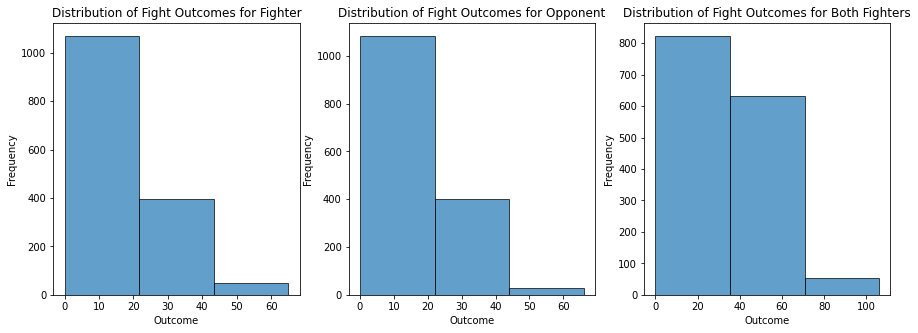

In [14]:
#צריך להבין מה זה עושה...

# Get the total wins, losses and draws for each fighter
fighter_outcome = merged_cleaned[['W', 'L', 'D']]
opponent_outcome = merged_cleaned[['Oppo_W', 'Oppo_L', 'Oppo_D']]

# Combine the wins, losses and draws for both fighters
both_outcome = fighter_outcome.sum(axis=1) + opponent_outcome.sum(axis=1)

# Plot the histograms
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(np.array(fighter_outcome.sum(axis=1)), bins=3, edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Outcome')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Fight Outcomes for Fighter')

ax[1].hist(np.array(opponent_outcome.sum(axis=1)), bins=3, edgecolor='black', alpha=0.7)
ax[1].set_xlabel('Outcome')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of Fight Outcomes for Opponent')

ax[2].hist(both_outcome, bins=3, edgecolor='black', alpha=0.7)
ax[2].set_xlabel('Outcome')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Distribution of Fight Outcomes for Both Fighters')

# Show plot
plt.show()

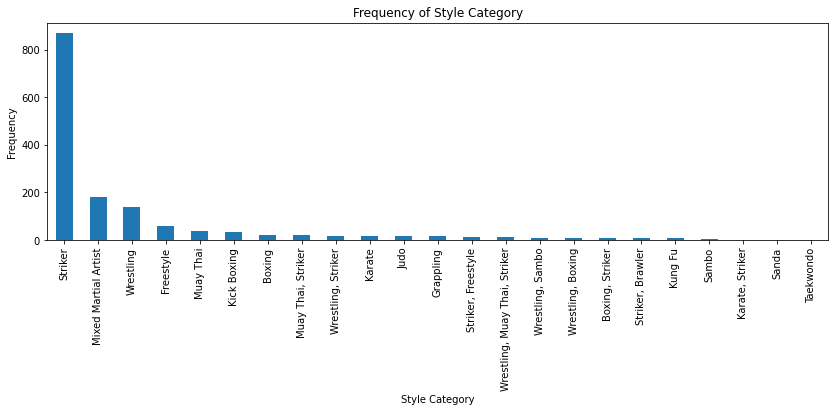

In [15]:
#זה מחשב רק את מי שהיה לוחם, מה אם כאלה שתחת עמודת מתחרים? גם הקטגוריה שלהם צריכה להופיע פה...
plt.figure(figsize=(14, 4))
merged_cleaned['Style(op)'].value_counts().plot.bar()
# add title and labels to the plot
plt.title('Frequency of Style Category')
plt.xlabel('Style Category')
plt.ylabel('Frequency')

# show the plot
plt.show()

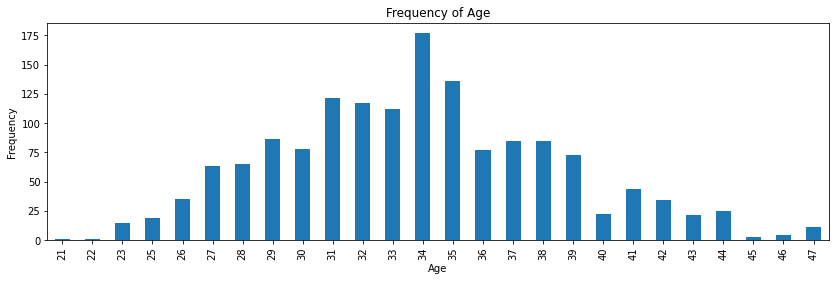

In [16]:
#מה אם המתחרה? איפה טווח הגילאים שלו? זה אמור גם להופיע פה
plt.figure(figsize=(14, 4))
merged_cleaned['Age'].value_counts().sort_index().plot.bar()
# add title and labels to the plot
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# show the plot
plt.show()

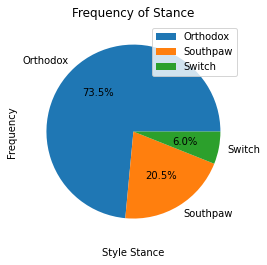

In [17]:
#להוסיף לייבלים=כותרות לנתונים בעודה
#מה עם נתוני המתחרה גם הם צריכים להופיע בתוך הגרף הזה כחלק מהלוחמים
plt.figure(figsize=(18, 4))
values = merged_cleaned['Stance'].value_counts()
labels = values.index
plt.pie(values, autopct='%1.1f%%', labels=labels)

plt.title('Frequency of Stance')
plt.xlabel('Style Stance')
plt.ylabel('Frequency')
plt.legend(labels, loc='best')

# show the plot
plt.show()

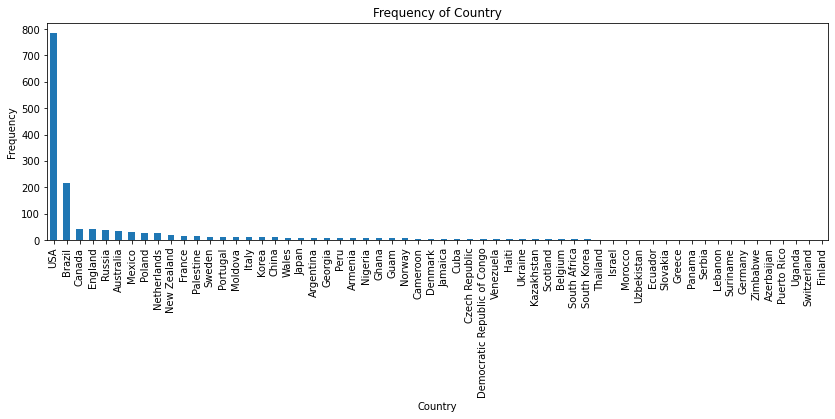

In [18]:
#מה עם נתוני המתחרה גם הם צריכים להופיע בתוך הגרף הזה כחלק מהלוחמים

plt.figure(figsize=(14, 4))
merged_cleaned['Country'].value_counts().plot.bar()

# add title and labels to the plot
plt.title('Frequency of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')

# show the plot
plt.show()

In [19]:
merged_cleaned.info()
#merged_cleaned["Res."]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 13602
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fighter              1510 non-null   object        
 1   Height               1510 non-null   int32         
 2   Weight(lbs)          1510 non-null   int32         
 3   Style(op)            1510 non-null   object        
 4   Country              1510 non-null   object        
 5   Age                  1510 non-null   object        
 6   Stance               1510 non-null   object        
 7   Reach                1510 non-null   int32         
 8   WT_class             1510 non-null   object        
 9   Date                 1510 non-null   datetime64[ns]
 10  Opponent             1510 non-null   object        
 11  Res.                 1510 non-null   object        
 12  Decision             1510 non-null   object        
 13  Rnd                  1510 non-nu

<AxesSubplot: >

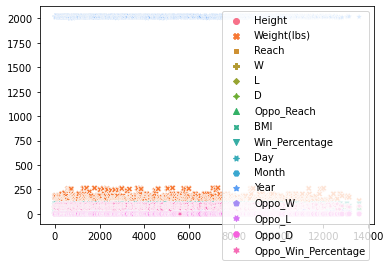

In [20]:
merged_cleaned_copy = merged_cleaned.copy()
sns_merged_cleaned_F = merged_cleaned.copy()
sns_merged_cleaned_Op = merged_cleaned.copy()
sns_merged_cleaned_F = sns_merged_cleaned_F[["Height","Age", "Reach","Weight(lbs)","Res.","BMI"]]
#sns.scatterplot(x="Height", y="Res.", data=sns_merged_cleaned_F)
#sns.scatterplot(y="Res.",x="Reach", data=sns_merged_cleaned_F)
#sns_merged_cleaned_Op = sns_merged_cleaned_Op[["Oppo_Height","Oppo_Age", "Oppo_Reach","Oppo_Weight","W","L","D"]]
#sns_merged_cleaned
#sns.pairplot(sns_merged_cleaned_F)
#cat_map = {"W": 1, "D": 2, "L": 3}
#merged_cleaned_copy["Res."] = merged_cleaned_copy["Res."].map(cat_map)

# create a scatter plot using Seaborn
sns.scatterplot(data=merged_cleaned_copy)
#merged_cleaned_copy


In [21]:
merged_cleaned["Res."]

0        L
3        W
9        L
10       L
11       W
        ..
12842    W
13059    L
13095    L
13156    L
13602    L
Name: Res., Length: 1510, dtype: object

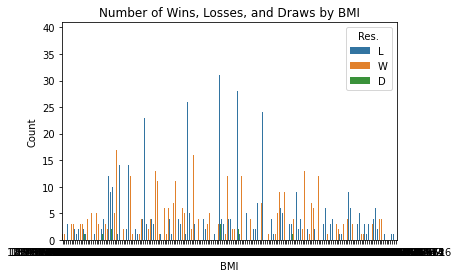

<Figure size 1296x576 with 0 Axes>

In [22]:
sns.countplot(x="BMI", hue="Res.", data=merged_cleaned.copy())

# Set the title and labels
plt.title("Number of Wins, Losses, and Draws by BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.figure(figsize=(18, 8))
# Show the plot
plt.show()


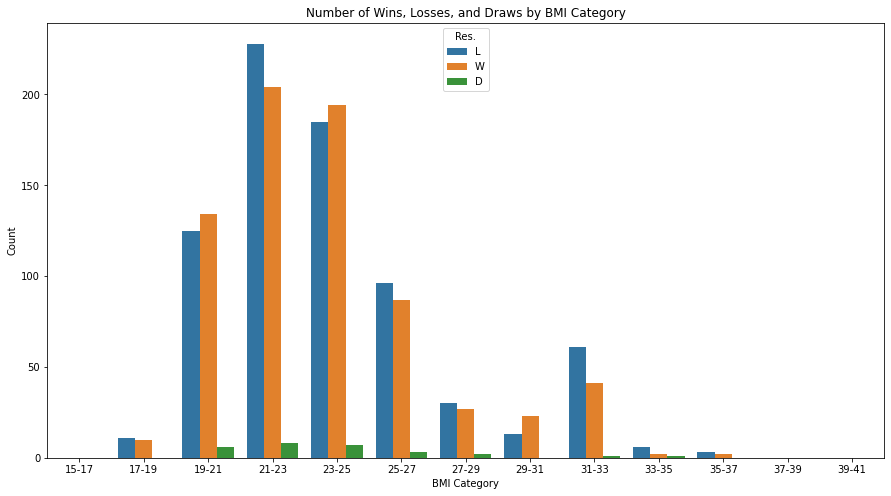

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))

# Create a new column with BMI category
merged_cleaned_copy['BMI_Category'] = pd.cut(merged_cleaned_copy['BMI'], bins=[15,17,19,21,23, 25,27,29,31,33,35,37,39,40], labels=["15-17", "17-19", "19-21", "21-23", "23-25", "25-27", "27-29", "29-31", "31-33", "33-35", "35-37", "37-39", "39-41"])

# Create a countplot with BMI category on the x-axis and Result on the y-axis
sns.countplot(x="BMI_Category", hue="Res.", data=merged_cleaned_copy,ax=ax)

# Set the title and labels
plt.title("Number of Wins, Losses, and Draws by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")

# Show the plot
plt.show()



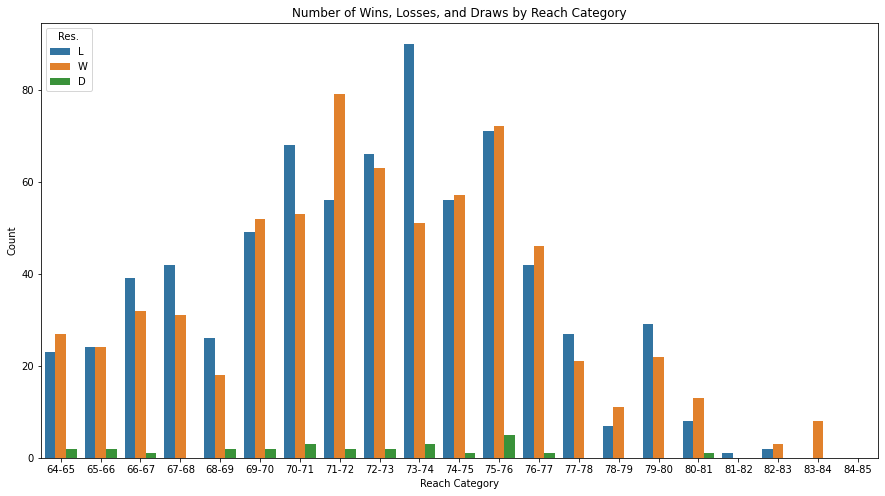

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
merged_cleaned_copy["Reach"] = merged_cleaned_copy["Reach"].astype(int)
merged_cleaned_copy["Reach"]
# Create a new column with BMI category
merged_cleaned_copy['Reach_Category'] = pd.cut(merged_cleaned_copy['Reach'], bins=[64, 65, 66, 67, 68, 69,70, 71, 72,73,74, 75, 76,77, 78, 79, 80, 81, 82, 83, 84, 85], labels=["64-65", "65-66", "66-67", "67-68", "68-69", "69-70", "70-71", "71-72", "72-73", "73-74", "74-75", "75-76", "76-77", "77-78", "78-79", "79-80", "80-81", "81-82", "82-83", "83-84", "84-85"])

# Create a countplot with BMI category on the x-axis and Result on the y-axis
sns.countplot(x="Reach_Category", hue="Res.", data=merged_cleaned_copy,ax=ax)

# Set the title and labels
plt.title("Number of Wins, Losses, and Draws by Reach Category")
plt.xlabel("Reach Category")
plt.ylabel("Count")

# Show the plot
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_15044\3178025831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res.'] = pd.Categorical(df['Res.'], categories=['W', 'L', 'D'], ordered=True)


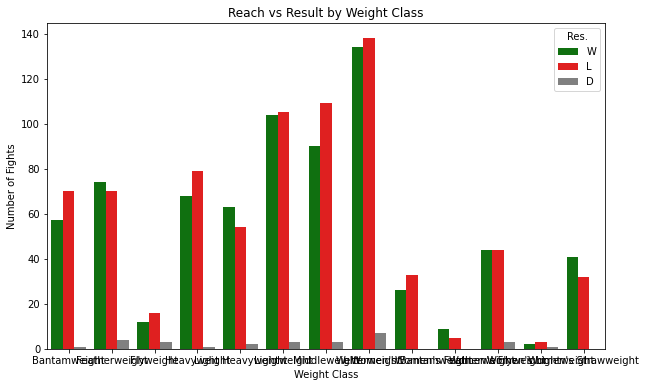

In [25]:
data = merged_cleaned.copy()
# Filter the dataset to include only relevant columns
df = data[['WT_class', 'Res.', 'Reach']]

# Convert 'Res.' column to categorical data type
df['Res.'] = pd.Categorical(df['Res.'], categories=['W', 'L', 'D'], ordered=True)

# Calculate the count of fights for each weight class and result
reach_count = df.groupby(['WT_class', 'Res.'])['Reach'].count().reset_index()

# Create the count plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='WT_class', y='Reach', hue='Res.', data=reach_count, 
                    palette={'W':'green', 'L':'red', 'D':'gray'})

# Set the x-axis label and title
ax.set_xlabel('Weight Class')
ax.set_ylabel('Number of Fights')
ax.set_title('Reach vs Result by Weight Class')
plt.show()



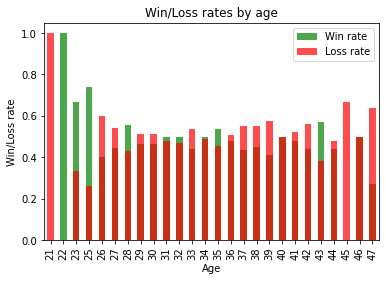

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MMA dataset into a pandas dataframe
df = merged_cleaned.copy()

# Calculate the total fights for each age group
total_fights = df.groupby("Age")["Res."].count()

# Calculate the number of wins and losses for each age group
wins = df[df["Res."] == "W"].groupby("Age")["Res."].count()
losses = df[df["Res."] == "L"].groupby("Age")["Res."].count()

# Calculate the win and loss rates for each age group
win_rate = wins / total_fights
loss_rate = losses / total_fights

# Create a bar chart of win and loss rates by age
ax = win_rate.plot(kind="bar", color="g", alpha=0.7)
loss_rate.plot(kind="bar", color="r", alpha=0.7, ax=ax)

# Set the x-axis label and title
plt.xlabel("Age")
plt.ylabel("Win/Loss rate")
plt.title("Win/Loss rates by age")

# Add a legend for the win and loss bars
plt.legend(["Win rate", "Loss rate"])

# Show the plot
plt.show()


In [27]:
merged_cleaned[merged_cleaned["Age"] == '45']

Fighter  Height  Weight(lbs)  Style(op) Country Age    Stance  \
1774  Brandon Vera      74          265  Muay Thai     USA  45  Orthodox   
1776  Brandon Vera      74          265  Muay Thai     USA  45  Orthodox   
1777  Brandon Vera      74          265  Muay Thai     USA  45  Orthodox   

      Reach           WT_class       Date  ...      Oppo_WT_class       BMI  \
1774     76  Light Heavyweight 2012-08-04  ...  Light Heavyweight  34.02027   
1776     76  Light Heavyweight 2011-01-01  ...  Light Heavyweight  34.02027   
1777     76  Light Heavyweight 2010-03-21  ...  Light Heavyweight  34.02027   

     Win_Percentage Day Month  Year  Oppo_W  Oppo_L  Oppo_D  \
1774      68.421053   4     8  2012      20       6       0   
1776      70.588235   1     1  2011      14       2       0   
1777      75.000000  21     3  2010       9       1       0   

     Oppo_Win_Percentage  
1774           76.923077  
1776           87.500000  
1777           90.000000  

[3 rows x 34 columns]

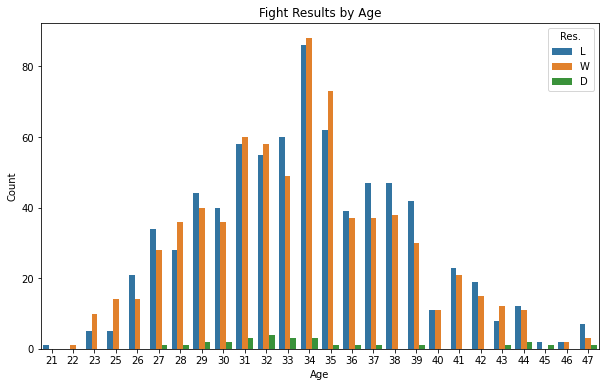

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the MMA dataset into a pandas dataframe
df = merged_cleaned.copy()

# Sort the unique age values in ascending order
sorted_ages = sorted(df["Age"].unique())

# Create a countplot of age vs. result
plt.figure(figsize=(10,6))
sns.countplot(x="Age", hue="Res.", data=df, order=sorted_ages)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Fight Results by Age")
plt.show()



In [29]:
merged_cleaned.columns

Index(['Fighter', 'Height', 'Weight(lbs)', 'Style(op)', 'Country', 'Age',
       'Stance', 'Reach', 'WT_class', 'Date', 'Opponent', 'Res.', 'Decision',
       'Rnd', 'Time', 'Event', 'W', 'L', 'D', 'Oppo_Style(op)', 'Oppo_Country',
       'Oppo_Age', 'Oppo_Stance', 'Oppo_Reach', 'Oppo_WT_class', 'BMI',
       'Win_Percentage', 'Day', 'Month', 'Year', 'Oppo_W', 'Oppo_L', 'Oppo_D',
       'Oppo_Win_Percentage'],
      dtype='object')

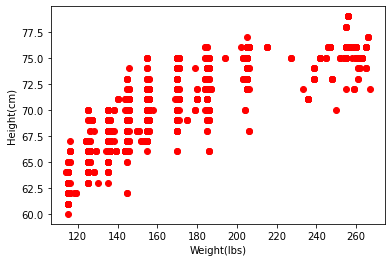

In [30]:
#מה עם נתוני המתחרה גם הם צריכים להופיע בתוך הגרף הזה כחלק מהלוחמים


x=merged_cleaned["Weight(lbs)"]
y=merged_cleaned["Height"]
plt.plot(x, y,'ro')

# Add labels to the x-axis and y-axis
plt.xlabel("Weight(lbs)")
plt.ylabel("Height(cm)")

# Show the plot
plt.show()

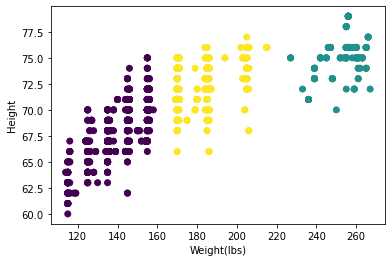

In [31]:
# Sample data
this_df=merged_cleaned[["Weight(lbs)","Height"]].to_numpy()
x=merged_cleaned["Weight(lbs)"]
y=merged_cleaned["Height"]

# Fit KMeans model to the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(this_df)

# Predict the cluster for each data point
predictions = kmeans.predict(this_df)

# Plot the data points, colored according to the cluster they belong to
plt.scatter(x, y, c=predictions, cmap='viridis')

# Add labels to the x and y axes
plt.xlabel('Weight(lbs)')
plt.ylabel('Height')

# Show the plot
plt.show()




In [32]:
#פה אני רוצה פלוט התפלגות של אחוז נצחון כפונקציה של סטייל או כפונקציה של סטנס

C:\Users\Owner\AppData\Local\Temp\ipykernel_15044\1067403864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Age_Range"] = pd.cut(df_subset["Age"], bins=range(0, 55, 3))


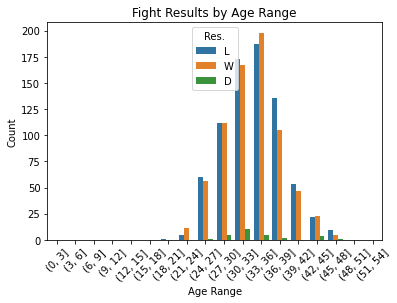

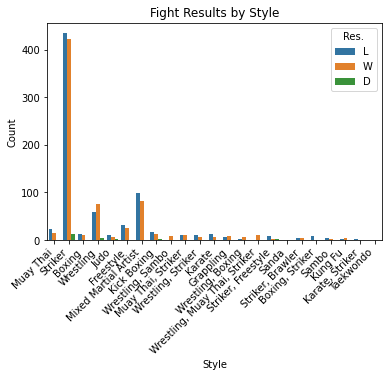

In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MMA dataset into a pandas dataframe
df = merged_cleaned.copy()
df["Age"] = df["Age"].astype(int)
# Subset the data to only include relevant columns for the analysis
subset_cols = ["Fighter", "Weight(lbs)", "Reach", "Res.", "Age", "Stance","Style(op)"]
df_subset = df[subset_cols]

df_subset["Age_Range"] = pd.cut(df_subset["Age"], bins=range(0, 55, 3))
ax = sns.countplot(x="Age_Range", hue="Res.", data=df_subset)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Fight Results by Age Range")
plt.xticks(rotation=45)
plt.show()




# Explore the relationship between stance and result
ax = sns.countplot(x="Style(op)", hue="Res.", data=df_subset)
plt.xlabel("Style")
plt.ylabel("Count")
plt.title("Fight Results by Style")

# Rotate x-axis labels diagonally
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


In [37]:

merged_cleaned["Oppo_Win_Percentage"].fillna(0,inplace=True)
merged_cleaned.info()
merged_cleaned.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 13602
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fighter              1510 non-null   object        
 1   Height               1510 non-null   int32         
 2   Weight(lbs)          1510 non-null   int32         
 3   Style(op)            1510 non-null   object        
 4   Country              1510 non-null   object        
 5   Age                  1510 non-null   object        
 6   Stance               1510 non-null   object        
 7   Reach                1510 non-null   int32         
 8   WT_class             1510 non-null   object        
 9   Date                 1510 non-null   datetime64[ns]
 10  Opponent             1510 non-null   object        
 11  Res.                 1510 non-null   object        
 12  Decision             1510 non-null   object        
 13  Rnd                  1510 non-nu

Index(['Fighter', 'Height', 'Weight(lbs)', 'Style(op)', 'Country', 'Age',
       'Stance', 'Reach', 'WT_class', 'Date', 'Opponent', 'Res.', 'Decision',
       'Rnd', 'Time', 'Event', 'W', 'L', 'D', 'Oppo_Style(op)', 'Oppo_Country',
       'Oppo_Age', 'Oppo_Stance', 'Oppo_Reach', 'Oppo_WT_class', 'BMI',
       'Win_Percentage', 'Day', 'Month', 'Year', 'Oppo_W', 'Oppo_L', 'Oppo_D',
       'Oppo_Win_Percentage'],
      dtype='object')

In [100]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score ,f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


# Load the data into a pandas dataframe
df = merged_cleaned.copy()
df['Style(op)'] = le.fit_transform(df['Style(op)'].astype(str))
df['Country'] = le.fit_transform(df['Country'].astype(str))
df['Stance'] = le.fit_transform(df['Stance'].astype(str))
df['Oppo_Style(op)'] = le.fit_transform(df['Oppo_Style(op)'].astype(str))
df['Oppo_Country'] = le.fit_transform(df['Oppo_Country'].astype(str))
df['Oppo_Stance'] = le.fit_transform(df['Oppo_Stance'].astype(str))
df['WT_class'] = le.fit_transform(df['WT_class'].astype(str))
df['Oppo_WT_class'] = le.fit_transform(df['Oppo_WT_class'].astype(str))
df['Res.'] = le.fit_transform(df['Res.'].astype(str))
# Drop any irrelevant or missing value columns
df = df.drop(['Fighter', 'Opponent', 'Date', 'Event', 'Rnd', 'Decision','Day','Month','Year','Time','Weight(lbs)',	'Height'], axis=1)
# Encode categorical variables using label encoding
X = df.drop(columns=['Res.'],axis=1)
y = df['Res.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

# create a list of machine learning algorithms to iterate through
ml_algorithms = [LinearRegression(), ElasticNet(), Lasso(), Ridge(),
                DecisionTreeRegressor(), RandomForestRegressor(), 
                GradientBoostingRegressor(), SVR(), KNeighborsRegressor(), 
                GaussianNB(), xgb.XGBRegressor(), lgb.LGBMRegressor(), 
                cb.CatBoostRegressor()]

# iterate through the list of algorithms and fit them to your data
for algorithm in ml_algorithms:
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    # do something with the predicted values (e.g. calculate accuracy or save them to a file)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Age: object, Oppo_Age: object

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# create a list of machine learning algorithms to iterate through
ml_algorithms = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
df = merged_cleaned.copy()
df['Style(op)'] = le.fit_transform(df['Style(op)'].astype(str))
df['Country'] = le.fit_transform(df['Country'].astype(str))
df['Stance'] = le.fit_transform(df['Stance'].astype(str))
df['Oppo_Style(op)'] = le.fit_transform(df['Oppo_Style(op)'].astype(str))
df['Oppo_Country'] = le.fit_transform(df['Oppo_Country'].astype(str))
df['Oppo_Stance'] = le.fit_transform(df['Oppo_Stance'].astype(str))
df['WT_class'] = le.fit_transform(df['WT_class'].astype(str))
df['Oppo_WT_class'] = le.fit_transform(df['Oppo_WT_class'].astype(str))
df['Res.'] = le.fit_transform(df['Res.'].astype(str))

df = df.drop(['Fighter', 'Opponent', 'Date', 'Event', 'Rnd', 'Decision','Day','Month','Year','Time','Weight(lbs)',	'Height'], axis=1)
# Encode categorical variables using label encoding
X = df.drop(columns=['Res.'],axis=1)
y = df['Res.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)



# iterate through the list of algorithms and fit them to your data
for algorithm in ml_algorithms:
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Precision: ', precision)
print('Recall: ', recall)
print('f1: ', f1)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
    # do something with the predicted values (e.g. calculate accuracy or save them to a file)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [97]:
df = merged_cleaned.copy()
df['Style(op)'] = le.fit_transform(df['Style(op)'].astype(str))
df['Country'] = le.fit_transform(df['Country'].astype(str))
df['Stance'] = le.fit_transform(df['Stance'].astype(str))
df['Oppo_Style(op)'] = le.fit_transform(df['Oppo_Style(op)'].astype(str))
df['Oppo_Country'] = le.fit_transform(df['Oppo_Country'].astype(str))
df['Oppo_Stance'] = le.fit_transform(df['Oppo_Stance'].astype(str))
df['WT_class'] = le.fit_transform(df['WT_class'].astype(str))+1
df['Oppo_WT_class'] = le.fit_transform(df['Oppo_WT_class'].astype(str))
df['Res.'] = le.fit_transform(df['Res.'].astype(str))

corr = df.copy().corr(method='pearson')

corr["Res."].sort_values(ascending = False)



Res.                   1.000000
Win_Percentage         0.091772
Style(op)              0.075500
Oppo_L                 0.042605
Oppo_D                 0.032291
Oppo_WT_class          0.022299
WT_class               0.021267
Day                    0.019925
Stance                 0.012083
Reach                  0.012005
Oppo_Country           0.002584
Month                 -0.003224
Year                  -0.010406
Oppo_Stance           -0.011148
Country               -0.014054
Oppo_W                -0.018721
Height                -0.019353
BMI                   -0.022208
Weight(lbs)           -0.022468
W                     -0.026647
D                     -0.045813
Oppo_Reach            -0.046990
Oppo_Style(op)        -0.052214
L                     -0.054248
Oppo_Win_Percentage   -0.060051
Name: Res., dtype: float64

In [94]:
corr

Height  Weight(lbs)  Style(op)   Country    Stance  \
Height               1.000000     0.812874   0.135506  0.060586 -0.006577   
Weight(lbs)          0.812874     1.000000   0.187921 -0.006835 -0.097745   
Style(op)            0.135506     0.187921   1.000000  0.075039 -0.066193   
Country              0.060586    -0.006835   0.075039  1.000000  0.034495   
Stance              -0.006577    -0.097745  -0.066193  0.034495  1.000000   
Reach                0.893765     0.770109   0.139166  0.069543  0.014894   
WT_class            -0.272970    -0.233863  -0.110933 -0.062472 -0.057208   
Res.                -0.019353    -0.022468   0.075500 -0.014054  0.012083   
W                    0.255594     0.243469   0.167986 -0.083164 -0.064760   
L                    0.152268     0.127101   0.045993  0.066796 -0.056766   
D                    0.025978     0.025914   0.059405 -0.083168 -0.048703   
Oppo_Style(op)       0.115555     0.169912   0.257425 -0.041316 -0.034439   
Oppo_Country        -0.028751    -0.043010  -0.036824  0.089449  0.014283   
Oppo_Stance          0.066557     0.008501   0.038001  0.047861  0.061837   
Oppo_Reach           0.744313     0.756589   0.141509  0.002230 -0.019359   
Oppo_WT_class       -0.281819    -0.233906  -0.126527 -0.071289 -0.056448   
BMI                  0.542285     0.926908   0.186070 -0.056325 -0.124744   
Win_Percentage       0.023657     0.058357   0.038408 -0.058240  0.027234   
Day                  0.051613     0.041633   0.024310  0.007206  0.022002   
Month               -0.047610    -0.030501  -0.034873  0.033695 -0.000813   
Year                -0.120438    -0.121500  -0.077217 -0.014876  0.067422   
Oppo_W               0.215001     0.142229   0.178105 -0.016069 -0.006448   
Oppo_L               0.122479     0.069253   0.093993  0.007098 -0.004271   
Oppo_D               0.076203     0.033166   0.030539  0.005836 -0.010602   
Oppo_Win_Percentage  0.050171     0.046897   0.016357  0.007339 -0.002658   

                        Reach  WT_class      Res.         W         L  ...  \
Height               0.893765 -0.272970 -0.019353  0.255594  0.152268  ...   
Weight(lbs)          0.770109 -0.233863 -0.022468  0.243469  0.127101  ...   
Style(op)            0.139166 -0.110933  0.075500  0.167986  0.045993  ...   
Country              0.069543 -0.062472 -0.014054 -0.083164  0.066796  ...   
Stance               0.014894 -0.057208  0.012083 -0.064760 -0.056766  ...   
Reach                1.000000 -0.292502  0.012005  0.272421  0.159166  ...   
WT_class            -0.292502  1.000000  0.021267 -0.168948 -0.080430  ...   
Res.                 0.012005  0.021267  1.000000 -0.026647 -0.054248  ...   
W                    0.272421 -0.168948 -0.026647  1.000000  0.729928  ...   
L                    0.159166 -0.080430 -0.054248  0.729928  1.000000  ...   
D                    0.023032 -0.033991 -0.045813  0.289731  0.266605  ...   
Oppo_Style(op)       0.097320 -0.091662 -0.052214  0.120801 -0.002160  ...   
Oppo_Country        -0.035637 -0.045714  0.002584 -0.020662 -0.020026  ...   
Oppo_Stance          0.057531 -0.062323 -0.011148  0.028427  0.021478  ...   
Oppo_Reach           0.732808 -0.293931 -0.046990  0.282787  0.145018  ...   
Oppo_WT_class       -0.303165  0.917072  0.022299 -0.163296 -0.073137  ...   
BMI                  0.553802 -0.173273 -0.022208  0.199174  0.086816  ...   
Win_Percentage       0.059105 -0.048938  0.091772 -0.105484 -0.565753  ...   
Day                  0.063044 -0.025541  0.019925  0.032518  0.030995  ...   
Month               -0.043821  0.001281 -0.003224 -0.015559 -0.007626  ...   
Year                -0.101161 -0.034649 -0.010406  0.077136  0.161014  ...   
Oppo_W               0.233362 -0.144054 -0.018721  0.411911  0.227405  ...   
Oppo_L               0.134762 -0.068433  0.042605  0.260454  0.207275  ...   
Oppo_D               0.056679 -0.033156  0.032291  0.103231  0.081417  ...   
Oppo_Win_Percentage  0.054299 -0.058617 -0.060051 -0.016649 -0.068712 

In [92]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score ,f1_score


# Load the data into a pandas dataframe
df = merged_cleaned.copy()
df['Style(op)'] = le.fit_transform(df['Style(op)'].astype(str))
df['Country'] = le.fit_transform(df['Country'].astype(str))
df['Stance'] = le.fit_transform(df['Stance'].astype(str))
df['Oppo_Style(op)'] = le.fit_transform(df['Oppo_Style(op)'].astype(str))
df['Oppo_Country'] = le.fit_transform(df['Oppo_Country'].astype(str))
df['Oppo_Stance'] = le.fit_transform(df['Oppo_Stance'].astype(str))
df['WT_class'] = le.fit_transform(df['WT_class'].astype(str))
df['Oppo_WT_class'] = le.fit_transform(df['Oppo_WT_class'].astype(str))
df['Res.'] = le.fit_transform(df['Res.'].astype(str))
# Drop any irrelevant or missing value columns
df = df.drop(['Fighter', 'Opponent', 'Date', 'Event', 'Rnd', 'Decision','Day','Month','Year','Time','Weight(lbs)',	'Height'], axis=1)
# Encode categorical variables using label encoding

le = LabelEncoder()
#df['Fighter'] = le.fit_transform(df['Fighter'].astype(str))


# Split the data into training and testing sets
X = df.drop(columns=['Res.'],axis=1)
y = df['Res.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15 ,random_state=42)

# Train a random forest classifier on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Precision: ', precision)
print('Recall: ', recall)
print('f1: ', f1)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
# Make predictions on new, unseen data



Test accuracy: 0.546
Precision:  0.5502645502645502
Recall:  0.5462555066079295
f1:  0.5403120107765683
R-squared: -0.689272676214546


In [287]:
len(merged_cleaned["Fighter"].unique())

489